In [8]:
import idx2numpy
import numpy as np
import os
import pickle
from PIL import Image
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



def load_data(data_directory, train = True):
    if train:
        images = idx2numpy.convert_from_file(os.path.join(data_directory, 'train-images.idx3-ubyte'))
        labels = idx2numpy.convert_from_file(os.path.join(data_directory, 'train-labels.idx1-ubyte'))
    else:
        images = idx2numpy.convert_from_file(os.path.join(data_directory, 't10k-images.idx3-ubyte'))
        labels = idx2numpy.convert_from_file(os.path.join(data_directory, 't10k-labels.idx1-ubyte'))

    vdim = images.shape[1] * images.shape[2]
    vectors = np.empty([images.shape[0], vdim])
    for imnum in range(images.shape[0]):
        imvec = images[imnum, :, :].reshape(vdim, 1).squeeze()
        vectors[imnum, :] = imvec
    
    return vectors, labels


In [2]:
train_images, train_labels = load_data('')

In [3]:
pca = PCA(70)
pca.fit(train_images)

PCA(n_components=70)

In [4]:
pca_matrix = pca.components_

In [6]:
pca_matrix.shape

(70, 784)

0th top principle component


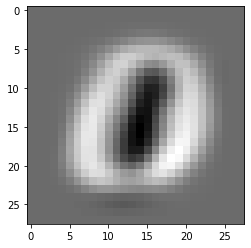

1th top principle component


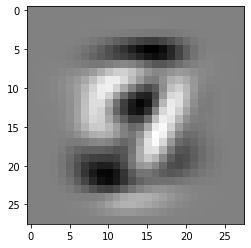

2th top principle component


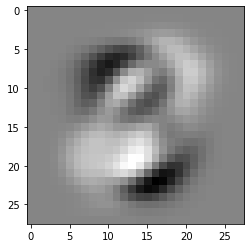

3th top principle component


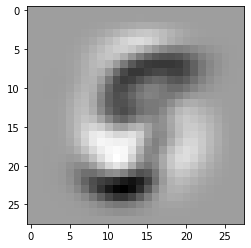

4th top principle component


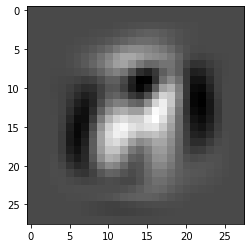

5th top principle component


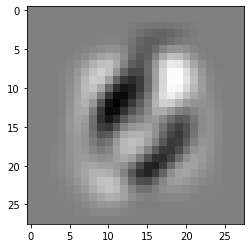

6th top principle component


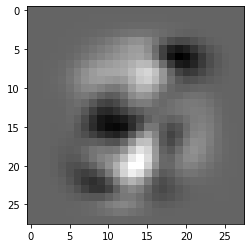

7th top principle component


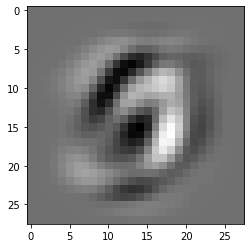

8th top principle component


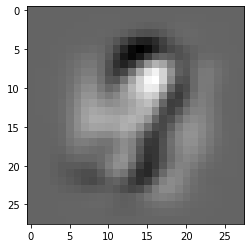

9th top principle component


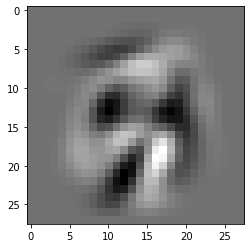

In [14]:
for i in range(10):
    pc = pca_matrix[i]
    print(str(i) +'th top principle component')
    plt.imshow(pc.reshape(28,28), cmap='gray')
    plt.show()

In [18]:
idx = random.randint(0, len(train_images) - 1)

In [19]:
image = train_images[idx]
label = train_labels[idx]

In [20]:
label

8

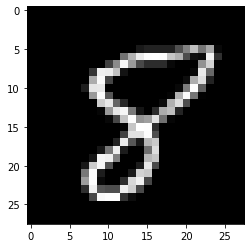

In [21]:
plt.imshow(image.reshape(28,28), cmap='gray', vmin=0, vmax=255)

In [26]:
export_image(image.reshape(28,28), name = 'PCA_original_image.tiff')

In [22]:
pca_dimensions = [2, 10, 50, 100, 200, 784]

projected_dimension: (2,)
reconstructed_dimension: (784,)


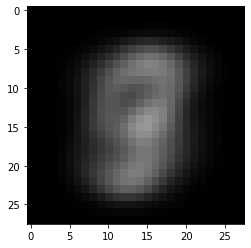

projected_dimension: (10,)
reconstructed_dimension: (784,)


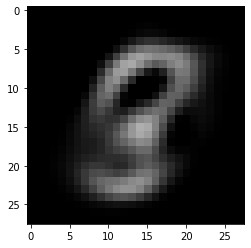

projected_dimension: (50,)
reconstructed_dimension: (784,)


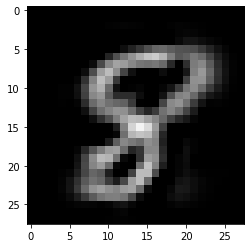

projected_dimension: (100,)
reconstructed_dimension: (784,)


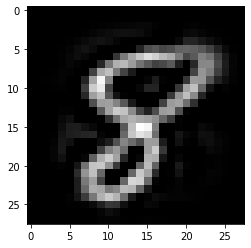

projected_dimension: (200,)
reconstructed_dimension: (784,)


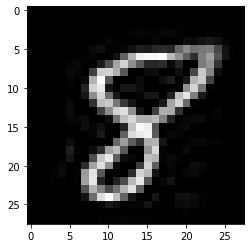

projected_dimension: (784,)
reconstructed_dimension: (784,)


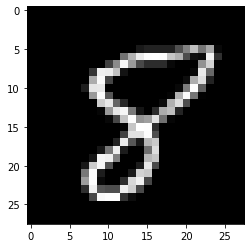

In [23]:
for p in pca_dimensions:
    pca = PCA(p)
    pca.fit(train_images)
    projected_train_images = pca.transform(train_images)
    projected_image = projected_train_images[idx]
    print('projected_dimension:', projected_image.shape)
    recon_train = pca.inverse_transform(projected_train_images)
    recon_image = recon_train[idx]
    print('reconstructed_dimension:', recon_image.shape)
    plt.imshow(recon_image.reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.show()

In [29]:
pca = PCA(200)
pca.fit(train_images)
projected_train_images = pca.transform(train_images)
projected_image = projected_train_images[idx]
recon_train = pca.inverse_transform(projected_train_images)
recon_image = recon_train[idx]
export_image(recon_image.reshape(28,28), name = 'PCA_reconstructed_image dim = 200.tiff')